# Init

In [187]:
!pip install yellowbrick

In [188]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import utils
import pandas as pd
import math
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [189]:
breast_cancer = load_breast_cancer()
x, y = breast_cancer.data, breast_cancer.target
labels = breast_cancer.target_names

In [190]:
labels

array(['malignant', 'benign'], dtype='<U9')

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [192]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Clusterização K-Médias

N Clusters: 2 Avg: 0.3542973776417595
N Clusters: 3 Avg: 0.3187545220627861
N Clusters: 4 Avg: 0.173100153949386
N Clusters: 5 Avg: 0.16902111311788237


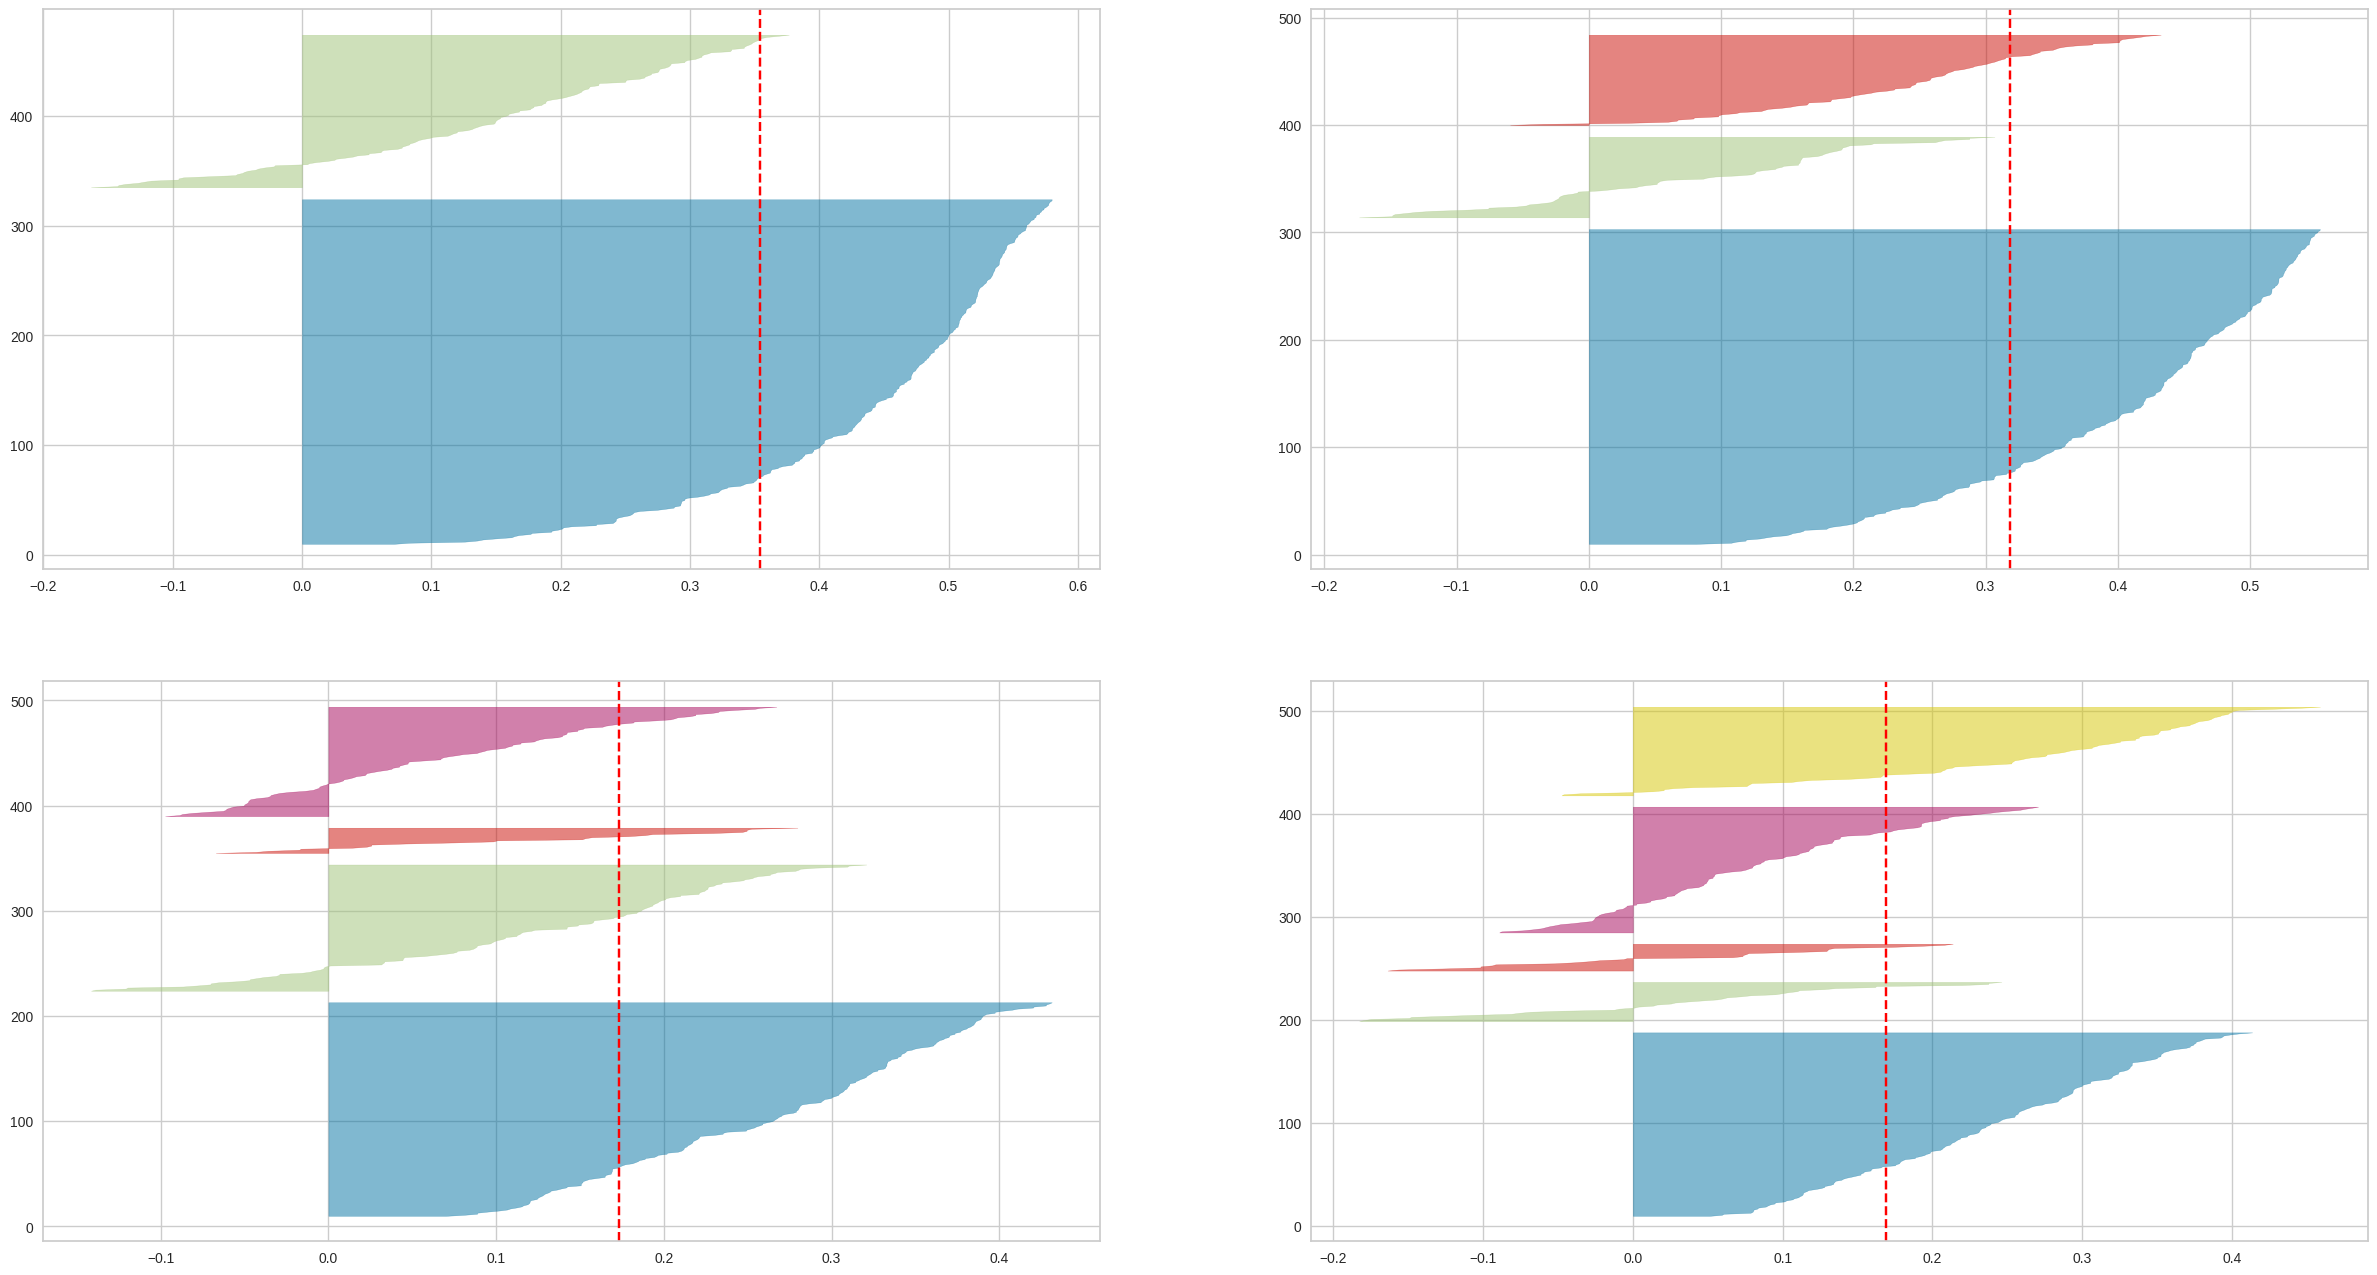

In [193]:
silhouette_scores, range_k = utils.visualize_silhouette(x_train, 5)

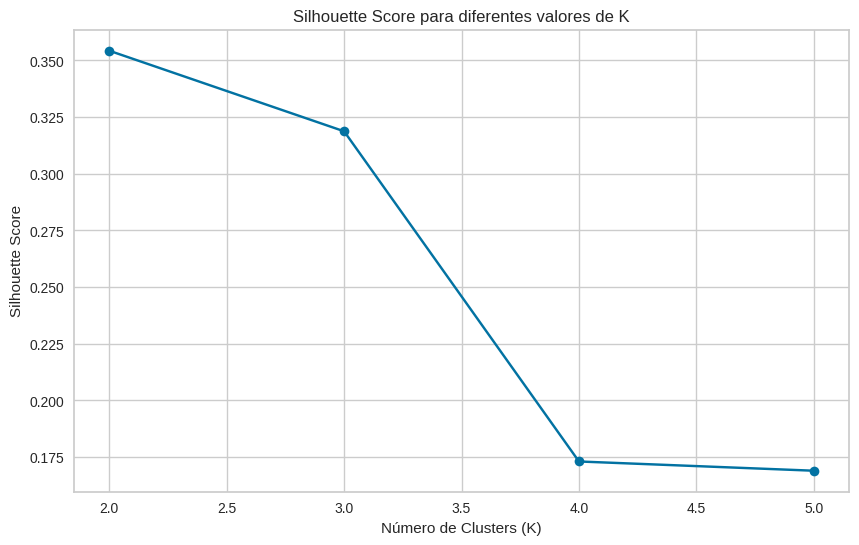

In [194]:
utils.visualize_sil_score_per_cluster(silhouette_scores, range_k)

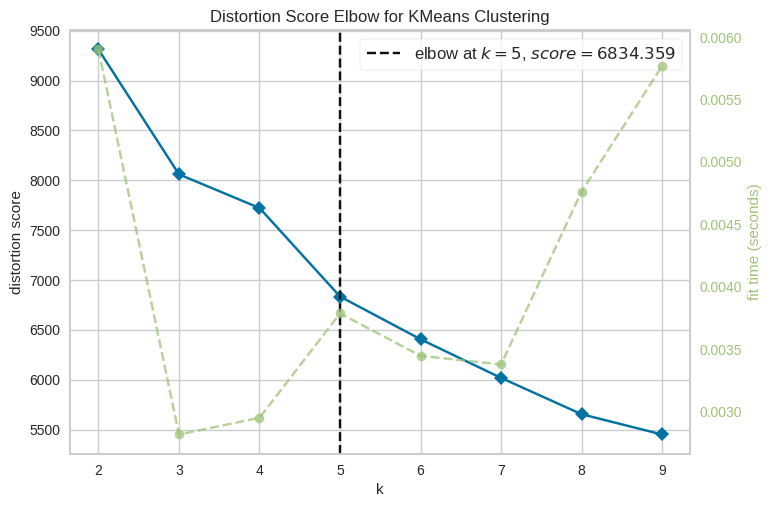

In [195]:
utils.visualize_elbow(x_train, 10)

# Criação de Features

In [196]:
n = 2

In [197]:
km = KMeans(n_clusters=n, random_state=0)
clusters = km.fit_predict(x_train)
centroids = km.cluster_centers_

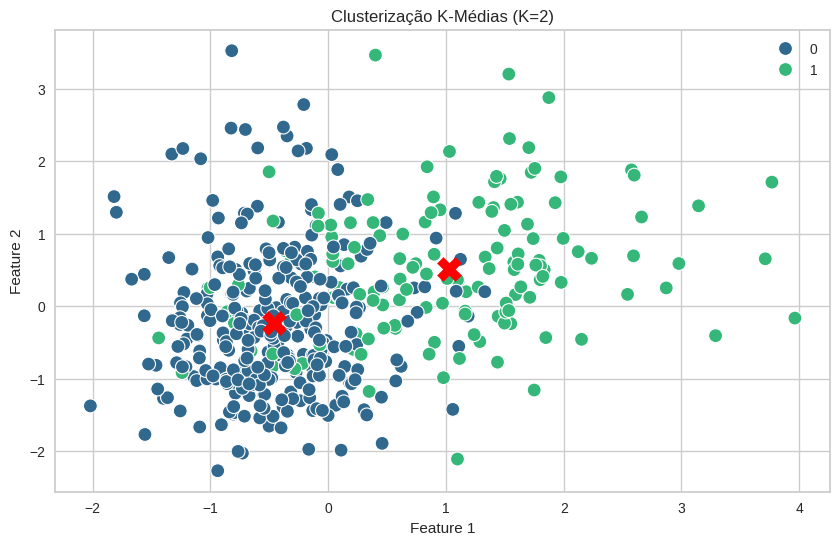

In [198]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x_train[:, 0], y=x_train[:, 1], hue=clusters, palette='viridis', s=100)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.title(f"Clusterização K-Médias (K={n})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [199]:
x_train_mod, x_test_mod = utils.criar_features_dataset(x_train, x_test, centroids)

In [200]:
x_train_mod

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,F0,F1
0,-1.150365,-0.390642,-1.128550,-0.958764,0.310984,-0.595995,-0.802596,-0.802490,0.294539,0.094251,...,-1.036045,-0.848808,0.342499,-0.730097,-0.812321,-0.757984,-0.016148,-0.385034,2.514336,8.013223
1,-0.937990,0.680514,-0.948201,-0.821525,-0.609636,-0.909867,-0.660669,-0.898716,0.754935,-0.425471,...,-0.689922,-0.668697,-0.095537,-0.537866,-0.375048,-0.606870,0.096690,-0.386158,2.425773,7.298657
2,0.574121,-1.033336,0.513941,0.408586,-0.106161,-0.363019,-0.417990,-0.088446,-0.271820,-0.575221,...,0.262137,0.113888,-0.524724,-0.520866,-0.182989,-0.023719,-0.200502,-0.751443,3.144733,6.409231
3,-0.547220,-0.316022,-0.577622,-0.566615,0.586662,-0.649331,-0.805298,-0.500065,0.331078,0.540567,...,-0.735737,-0.658966,-0.816748,-1.034921,-1.091633,-0.852545,-1.076186,-0.546883,2.432737,7.629791
4,-0.527398,0.791240,-0.561563,-0.523571,-1.051446,-1.017532,-0.905149,-0.935806,-0.969721,-0.426939,...,-0.422423,-0.440955,-0.303494,-0.467251,-0.724565,-0.783118,0.311240,-0.082129,2.650728,7.830190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,1.330176,0.199096,1.197454,1.252698,-0.521129,-0.881910,-0.093733,0.252625,-0.947798,-1.865718,...,0.649345,0.605735,-0.361014,-0.888328,-0.233135,0.229158,-0.535836,-1.467962,4.689549,6.169007
451,-0.467933,1.176375,-0.323157,-0.497297,1.609573,2.702147,1.799057,0.952923,0.806090,2.901339,...,-0.277294,-0.289867,2.337996,5.270909,4.199765,1.633011,2.323247,6.968987,13.692268,10.719325
452,-1.324229,-0.200482,-1.317546,-1.048765,0.325493,-0.867634,-0.776990,-0.898197,-1.108571,1.016245,...,-0.923429,-0.753887,0.037201,-0.960905,-0.767691,-0.979750,-0.715423,-0.119781,2.723237,8.221441
453,-1.243810,-0.224553,-1.280076,-1.022212,-1.952479,-1.583811,-1.125696,-1.262871,-0.571443,0.264556,...,-1.323643,-0.985726,-2.711807,-1.468356,-1.341360,-1.754014,-1.581571,-1.006018,8.865973,13.106929


In [201]:
x_test_mod

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,F0,F1
0,-0.201756,0.329079,-0.130868,-0.271455,1.029198,0.864118,0.733639,0.856697,1.120328,1.553585,...,0.185286,-0.062808,1.103531,0.874443,1.219091,1.389329,1.082033,1.540297,5.615353,4.052342
1,-0.255558,1.467633,-0.317804,-0.324002,-0.616891,-1.016540,-0.769012,-0.726495,-0.695677,-1.002451,...,-0.465282,-0.423883,-0.157482,-0.951752,-0.644332,-0.833694,-0.731316,-0.877325,3.210124,7.968919
2,-0.026193,-0.840768,-0.091751,-0.132260,-1.215402,-0.941988,-0.857154,-0.575023,-0.805295,-0.999514,...,-0.310399,-0.328279,-1.285756,-0.981828,-1.027447,-0.494838,-1.220809,-0.921159,3.180706,8.347993
3,0.041767,-0.236588,-0.024635,-0.057911,-2.223804,-1.013566,-0.807228,-0.906497,-0.637214,-0.999514,...,-0.036398,-0.104976,-1.681759,-0.229905,-0.556576,-0.599974,-0.426177,-0.378290,3.680330,8.159961
4,-0.306528,-0.176411,-0.379156,-0.363413,-0.477601,-1.301861,-0.796034,-0.504734,-1.251074,-0.592839,...,-0.667162,-0.572410,-1.568489,-1.344779,-1.099005,-0.985727,-1.457609,-1.225189,3.859621,9.076723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.936575,1.542253,0.933931,0.822257,0.303729,0.223683,1.038596,0.448190,-1.832050,-0.588435,...,0.395147,0.238685,-0.361014,-0.474443,0.064230,-0.069697,-2.067886,-0.860466,12.831442,11.871647
110,-0.385814,-0.590431,-0.383273,-0.447265,1.167037,0.166183,-0.626442,-0.486059,1.134943,0.522949,...,-0.396117,-0.438907,0.665495,-0.352828,-0.627784,-0.521045,0.265152,0.116811,2.672428,6.290236
111,1.718115,0.093184,1.728619,1.666369,1.225074,0.903774,1.618914,2.002591,-0.312014,-0.313892,...,1.151828,1.020588,1.506170,0.276827,1.320386,1.576305,0.203171,-0.154062,7.414757,3.115273
112,1.188593,0.343521,1.193337,1.112945,0.753520,0.425926,0.893194,1.188431,0.184921,-0.478324,...,1.039508,1.044489,0.740713,0.011365,0.543625,0.560198,0.269920,-0.273201,5.450556,3.042435


# SVM

## Modelo de ML

In [202]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

### Dataset Original

In [203]:
svc_ori = SVC(probability=True)

In [204]:
grid_ori = GridSearchCV(estimator=svc_ori, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [205]:
grid_ori.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

### Dataset Modificado

In [206]:
svc_mod = SVC(probability=True)

In [207]:
grid_mod = GridSearchCV(estimator=svc_mod, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [208]:
grid_mod.fit(x_train_mod, y_train)

GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

## Avaliação dos Modelos

### Dataset Original

In [209]:
y_pred = utils.show_estimator_results(grid_ori, x_test, y_test)

Melhores parâmetros GridSearch: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Score GridSearch: 0.9736842105263158

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        47
           1       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



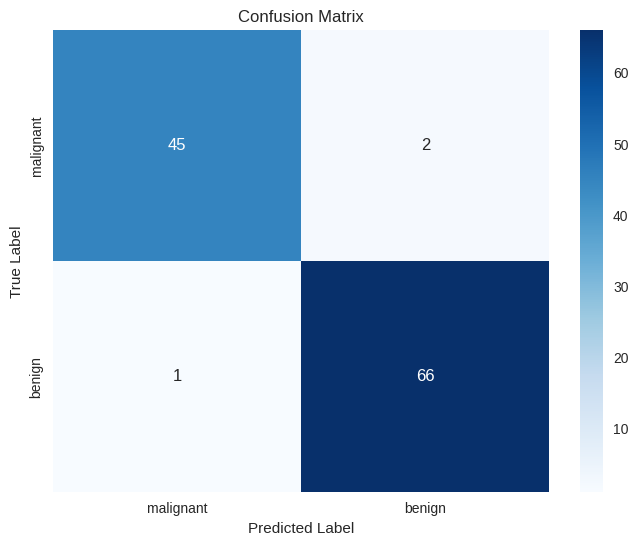

In [210]:
utils.show_cm(y_test, y_pred, labels)

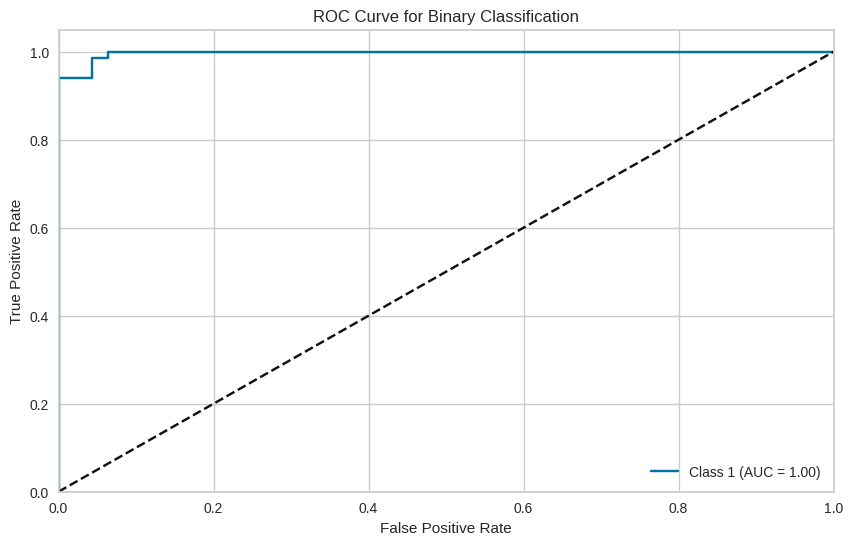

In [211]:
y_score = grid_ori.best_estimator_.predict_proba(x_test)

# Compute ROC curve and ROC area for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc="lower right")
plt.show()

### Dataset Modificado

In [212]:
y_pred = utils.show_estimator_results(grid_mod, x_test_mod, y_test)

Melhores parâmetros GridSearch: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Score GridSearch: 0.9912280701754386

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        47
           1       0.99      1.00      0.99        67

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



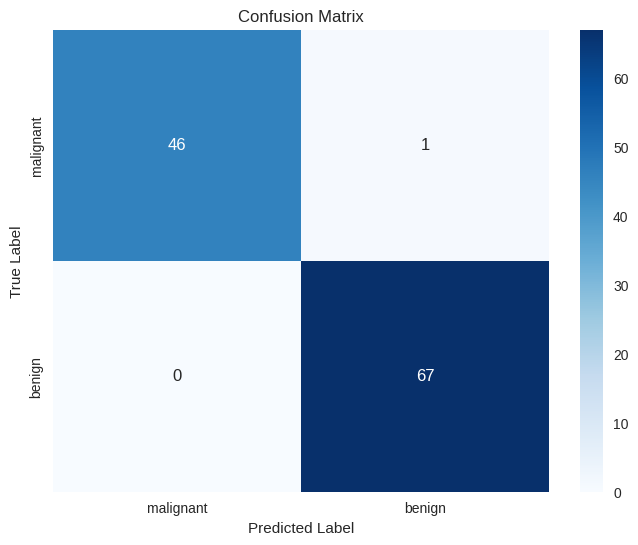

In [213]:
utils.show_cm(y_test, y_pred, labels)

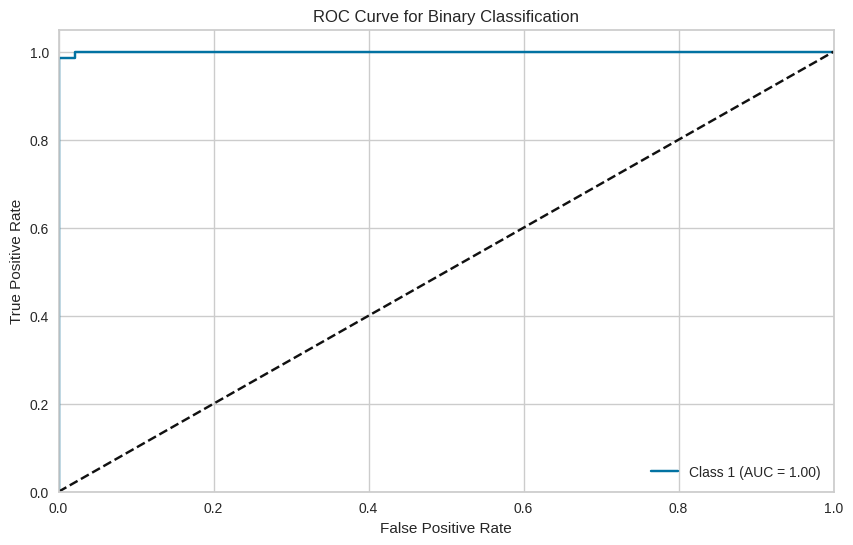

In [214]:
y_score = grid_mod.best_estimator_.predict_proba(x_test_mod)

fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc="lower right")
plt.show()

# Random Forest

## Modelo de ML

In [215]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
}

### Dataset Original

In [216]:
rf_ori = RandomForestClassifier()

In [217]:
grid_ori = GridSearchCV(estimator=rf_ori, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [218]:
grid_ori.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

### Dataset Modificado

In [219]:
rf_mod = RandomForestClassifier()

In [220]:
grid_mod = GridSearchCV(estimator=rf_mod, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [221]:
grid_mod.fit(x_train_mod, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

## Avaliação dos Modelos

### Dataset Original

In [222]:
y_pred = utils.show_estimator_results(grid_ori, x_test, y_test)

Melhores parâmetros GridSearch: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 50}
Score GridSearch: 0.9649122807017544

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



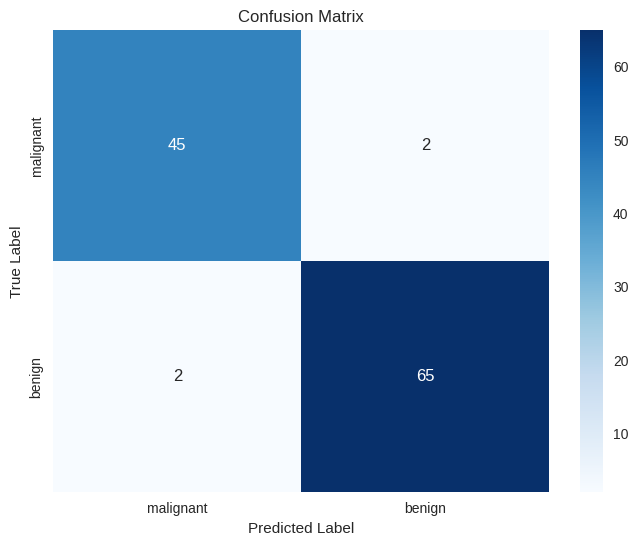

In [223]:
utils.show_cm(y_test, y_pred, labels)

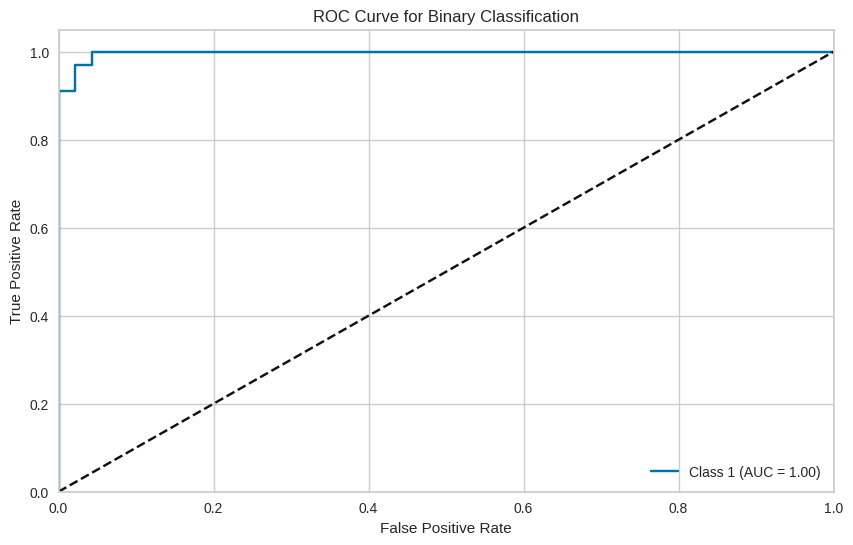

In [224]:
y_score = grid_ori.best_estimator_.predict_proba(x_test)

# Compute ROC curve and ROC area for the positive class (class 1)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc="lower right")
plt.show()

### Dataset Modificado

In [225]:
y_pred = utils.show_estimator_results(grid_mod, x_test_mod, y_test)

Melhores parâmetros GridSearch: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 50}
Score GridSearch: 0.956140350877193

Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        47
           1       0.98      0.94      0.96        67

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



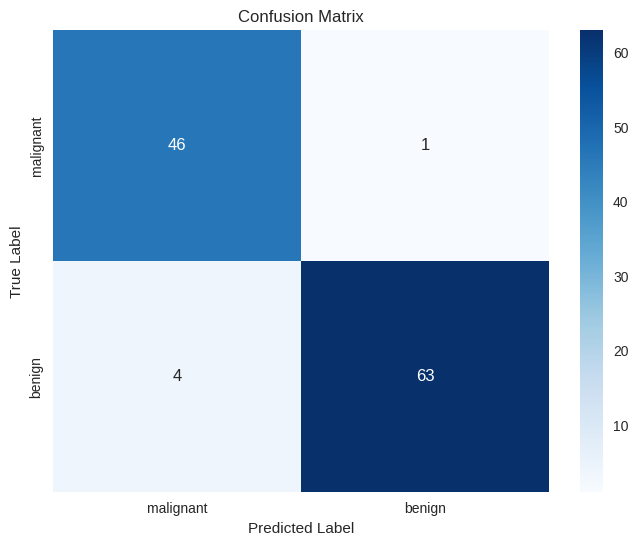

In [226]:
utils.show_cm(y_test, y_pred, labels)

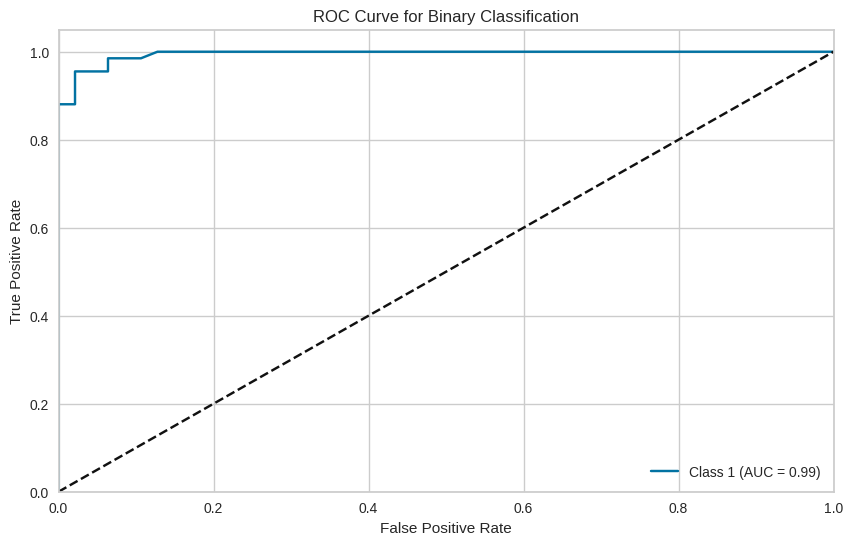

In [227]:
y_score = grid_mod.best_estimator_.predict_proba(x_test_mod)

fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Class 1 (AUC = {roc_auc:.2f})')

# Plotting the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Binary Classification')
plt.legend(loc="lower right")
plt.show()